## The Numpy Library

----

Burton Rosenberg

University of Miami

copyright 2023 burton rosenberg all rights reserved


----

### Table of contents.

1. <a href="#introduction">Introduction</a>
1. <a href="#features">Numpy features</a>
1. <a href="#import">Importing</a>
1. <a href="#making">Making numpy arrays</a>
1. <a href="#operation">Operations on ndarrays</a>
1. <a href="#shape">Shaping ndarrays</a>
1. <a href="#views">No copy views</a>
1. <a href="#broadcasting">Broadcasting</a>
1. <a href="#fancy">Fancy Indexing and Boolean Masks</a>
1. <a href="#matplotlib">A tiny bit of Matplotlib</a>


### <a name=introduction>Introduction</a>


Python is being used increasingly as a language for scientific computing because of its qualities as a programing language and because of community developed libraries extending the langauges abilities. One concern with using a powerful language like Python is that it loses the efficiency of languages which run "closer to the metal", although the analogy should be "closer to the silicon". For instance, programs written in C can be very efficient to run but they are not efficient to code. C codes slowly and requires extreme attention to detail.

The SciPy initiative attempts to solve this efficiency gap, and present powerful, efficient libraries of Python code for scientific programing. Some of these libraries are written in C to truely extend the way the language represents and manipulates data. These abilities are brought into your programs using an _import_ statement, naming a package or module that contains definitions. These then become avaiable for use in your program.

SciPy includes NumPy for numeric arrays, MatPlotLib for making graphs, and Pandas for tabularizing and cleaning data. In this page we talk about NumPy. The entire scipy library is described at [scipy.org](https://www.scipy.org/). One might also look at the [scipy-lectures](http://www.scipy-lectures.org/index.html) tutoral.

### <a name="features">Numpy features</a>


NumPy introduces the class _ndarray_, a multi-dimensional array of numbers. The ndarray improves on the list for efficiency and the collection methods it supports. That includes the notion of _universal functions_ and _broadcasting_. These concepts and methods make it very intuitive to us arrays for scientific computation. 
 
 
Numpy arrays support:

* Element-wise operations;
* Indexing operations based on strides;
* No-copy views when reshaping, when possible;
* Fast arrays based on a direct C-like representation;
* Broadcasting;
* Ufuncts for arithmetic, logical, and common functions;
* Masking and fancy indexing

See the [numpy reference](https://numpy.org/doc/stable/reference/routines.html)






### <a name="import">Importing</a>

Libraries, such as numpy, are made known to your namespace with an `import` statement.
The statement names the module, and the run-time searches for it given its known libarary path. What exactly is found is either a [package](https://docs.python.org/3/glossary.html#term-package) or a [module](https://docs.python.org/3/glossary.html#term-module).

_Note:_ If an import fails, either the module is not on the platform and needs to be installed, or the search path does not include the location where the module resides. 
Importing the `sys` object has interesting properties, such as `sys.path`, the contain a list of paths for the search of libraries.

The [import system](https://docs.python.org/3/reference/import.html) adds names either the to the current name space, or makes a new namespace for all the names in the library. The syntax `import numpy as np` means that a new namespace is created, calls `np`, and it is filled with all the names in the numpy module.

Once done, a numpy function, such as `array`, is accessed as `np.array`, the dot here being a namespace selection operator.


In [1]:
import sys
print(f'My system path is,')
for p in sys.path:
    print(f'\t{p}')
   

import numpy as np
print(f'Some properties of np:\n\tname: "{np.__name__}"\n\ttype: {type(np)},\n\tpath: {np.__path__}')

My system path is,
	/Users/ojo/git/reu-cfs-2023/scipy
	/opt/anaconda3/lib/python39.zip
	/opt/anaconda3/lib/python3.9
	/opt/anaconda3/lib/python3.9/lib-dynload
	
	/opt/anaconda3/lib/python3.9/site-packages
	/opt/anaconda3/lib/python3.9/site-packages/aeosa
	/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
	/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
	/Users/ojo/.ipython
Some properties of np:
	name: "numpy"
	type: <class 'module'>,
	path: ['/opt/anaconda3/lib/python3.9/site-packages/numpy']


### <a name="making">The ndarray</a>

The basic data structure of numpy is the `ndarray`. In fact, it is a native C array, with enough of a Python wrapper so that it fits in with the Python object system. The flexibility of the Python list has a lot of machinery that is not needed when the list is known to be a list of floats. In which case, the simple memory model of C is more efficient.

In C, an array of $n$ elements each requiring $b$ bytes is a sequence of $n\,b$ bytes. An array is somewhat synoymous with the address of the first of these bytes. Then the i-th element in the array is found beginning at byte number $a+i*b$, where $a$ is the address of the array. An `ndarray` stores numerical arrays as does C.




In [2]:
a = np.array([1,2,3],dtype=np.float32)

print(f'type: {type(a)}, element type: {type(a[0])}, shape: {a.shape}')

type: <class 'numpy.ndarray'>, element type: <class 'numpy.float32'>, shape: (3,)


Here are some ways, to create `ndarray`s.

In [3]:
n = 10
mean = 1.0
sd = 0.5

from_a_list = np.array([i for i in range(n)])
from_zeros = np.zeros(n)
from_ones = np.ones(n)
from_constant = np.full(n,sd)
from_random = np.random.random(n) # length for uniform from [0,1)
from_randint = np.random.randint(0,10,n) # low, high, length

# dtype optional parameter
from_arange = np.arange(0,n,sd,dtype=np.float64)   # start, stop, step


from_normal = np.random.normal(mean,sd,n)

print(f'list: {from_a_list}')
print(f'zeros: {from_zeros}')
print(f'ones: {from_ones}')
print(f'randoms:  {from_random}')
print(f'randint:  {from_randint}')
print(f'normal:  {from_normal}, avg: {sum(from_normal)/len(from_normal)}')
print(f'constant: {from_constant}')
print(f'range: {from_arange}')



list: [0 1 2 3 4 5 6 7 8 9]
zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ones: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
randoms:  [0.62391851 0.84760886 0.12754124 0.09748217 0.58978673 0.93217075
 0.66363331 0.87028652 0.36924044 0.5726382 ]
randint:  [2 7 9 0 1 4 5 7 1 1]
normal:  [ 0.83521344  1.77580812 -0.08296707  0.65790729  1.11483602  0.51694952
  1.20904525  0.88675381  1.14044014  1.32026147], avg: 0.9374248005183962
constant: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
range: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


### <a name="operation">Operations on ndarrays</a>

The ndarray works like a vector with scalar operations that apply elementwise. 
Two ndarrays of the same shape are operated on elementwise.
The elementwise operations also so included boolean value functions.



In [4]:
import math 

a = np.arange(5)
i = 2
j = 3
print(f'a = {a}\na+{i} = {a+i}\na*{j} = {a*j}')
print(f'a-{j}a = {a-j*a}')
print(f'a^2 = {a*a}')

print(f'a>{i}? {a>i}')

a = [0 1 2 3 4]
a+2 = [2 3 4 5 6]
a*3 = [ 0  3  6  9 12]
a-3a = [ 0 -2 -4 -6 -8]
a^2 = [ 0  1  4  9 16]
a>2? [False False False  True  True]


Special versions of operations work as _ufuncts_ on ndarrays, including any, all, min, max, sum, and math functions

In [5]:
a = np.arange(5)
print(f'max: {np.max(a)}')
if np.all(a<=np.max(a)):
    print('they are all small')

# dot product
print(f'length of a = {math.sqrt(np.sum(a*a)):.5f}')

a = np.array([i for i in range(n)])
any_odd_is = np.all(a%2==0)
print(f'are any odd? {any_odd_is}')
any_divsix_is= np.any(a%6==0)
print(f'are any divisible by six? {any_divsix_is}')
print(f'sin of those values: {np.sin(a[:len(a)//2])}')

max: 4
they are all small
length of a = 5.47723
are any odd? False
are any divisible by six? True
sin of those values: [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]


### <a name="shape">Shaping ndarrays</a>

The array shape is a tuple, stored in the `shape` property and set by the `reshape` method. It can also be reshaped by writing into the `shape` property.

Note the notation of a one-tuple, e.g.`(3,)`. The comma is needed to indicate this is a tuple, not a parenthesized integer.

In [6]:
a = np.arange(9)
print(f'shape: {a.shape}, a: {a}')
b = a.reshape((3,3))
print(f'shape: {b.shape},a: \n{b}\na: {a}')
a.shape = (3,3)
print(f'shape: {a.shape}, a:\n{a}')

shape: (9,), a: [0 1 2 3 4 5 6 7 8]
shape: (3, 3),a: 
[[0 1 2]
 [3 4 5]
 [6 7 8]]
a: [0 1 2 3 4 5 6 7 8]
shape: (3, 3), a:
[[0 1 2]
 [3 4 5]
 [6 7 8]]


### <a name="views">No copy views</a>

The wrapper around the C array that makes in `ndarray` supports _views_, while using slice notation to create the view. A view is an alternative way to look at the same array. It is called a no copy view, because slices do a shallow copy, and so for an array, a slice would make two separate copies of the list. 


In [7]:
# shallow copy slices
l1 = [i for i in range(10)]
l2 = l1[:]
l1[3] = -1
print(f'slicing a list:\nl1: {l1}\nl2: {l2}')
 

slicing a list:
l1: [0, 1, 2, -1, 4, 5, 6, 7, 8, 9]
l2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
l1 = np.array([i for i in range(10)])
l2 = l1[:]
l1[3] = -1
print(f'viewing an ndarray:\nl1: {l1}\nl2: {l2}')
 

viewing an ndarray:
l1: [ 0  1  2 -1  4  5  6  7  8  9]
l2: [ 0  1  2 -1  4  5  6  7  8  9]


Even more complicated slices are views to the original array.

In [9]:
a = np.arange(10)
print(f'a: {a}')
b = a[::2]
print(f'b: {b}')
b.fill(-1)
print(f'b: {b}')
print(f'a: {a}')


a: [0 1 2 3 4 5 6 7 8 9]
b: [0 2 4 6 8]
b: [-1 -1 -1 -1 -1]
a: [-1  1 -1  3 -1  5 -1  7 -1  9]


If you want a copy with slicing, use the `copy` method.

In [10]:
a = np.arange(10)
print(f'a: {a}')
b = a[::2].copy()
print(f'b: {b}')
b = -1 * b
print(f'b: {b}')
print(f'a: {a}]')

a: [0 1 2 3 4 5 6 7 8 9]
b: [0 2 4 6 8]
b: [ 0 -2 -4 -6 -8]
a: [0 1 2 3 4 5 6 7 8 9]]


### <a name="broadcasting">Broadcasting</a>

When numpy operates on two ndarrays of different shapes, it attempts to promote them to a common, compatible shape. As new cells are created, this is done by copying respective values from the existing shape. 

#### Example: (1,) and (3,)

When adding a scalar to a vector whose shapes are (1,) and (3,), the scalar is promoted to (3,) while duplicating its value; then the addition is done.


In [11]:
scalar = np.array([4])
vector = np.array([1,2,3])
print(f'{scalar} plus {vector} equals {scalar+vector}')

[4] plus [1 2 3] equals [5 6 7]


#### Example (3,) and (2,3)

When adding vector to a matrix whose shapes are (3,) and (2,3), the vector is promoted to (3,2) and the new row is a copy of the old row. This happens in two steps,

1. Promote the dimension 1 shape (3,) to the dimension 2 shape (1,3)
1. Promote the shape (1,3) to shape (2,3)b


In [12]:
vector = np.array([1,2,3])
matrix = np.array([1,2,3,4,5,6]).reshape((2,3))
print(f'{vector}\n+\n{matrix}\n=\n{vector+ matrix}')


[1 2 3]
+
[[1 2 3]
 [4 5 6]]
=
[[2 4 6]
 [5 7 9]]


#### Example (3,) and (1,3)

When adding vector to a row vector whose shapes are (3,) and (1,3), the both vectors are promoted to (3,3). In each case the values are broadcast.

This happens in three steps,

1. Promote the dimension 1 shape (3,) to the dimension 2 shape (1,3)
1. Promote the shape (1,3) to shape (3,3) by broadcast
1. Promote the dimension 1 shape (1,3) to shape (3,3) by broadcast

Note the dimesions. A row vector is consided by numpy to be dimension 2.

In [13]:
a = np.array([1,0,1])
b = np.array([[-1],[0],[-1]])

print(f'a: shape: {a.shape}, dimensions: {a.ndim}')
print(f'b: shape: {b.shape}, dimensions: {b.ndim}')

print(f'\nbroadcast {a} to (3,3):\n{a+np.zeros((3,3))}')
print(f'\nbroadcast\n{b}\nto (3,3):\n{b+np.zeros((3,3))}')
print(f'\nadding:\n{a+b}')


a: shape: (3,), dimensions: 1
b: shape: (3, 1), dimensions: 2

broadcast [1 0 1] to (3,3):
[[1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]

broadcast
[[-1]
 [ 0]
 [-1]]
to (3,3):
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]

adding:
[[ 0 -1  0]
 [ 1  0  1]
 [ 0 -1  0]]


#### General shape1 and shape2

- If the shapes have different dimensions, add sufficiet 1's on the left of the shape of lower dimension until the shapes have the same dimension.
- For shapes the the same dimension, if in any dimension both values are not one and unequal, stop. 
- Else, broadcast across the other dimensions of the shape with dimension 1 to make it the dimension of the other shape.


#### Broadcast in action

The rules make several common operations easy. The library provides a general vector-matrix multiplication called `dot`, (or `vdot` when a hermitian product is required). However this is how it can be done by broadcasting.


In [14]:
def matrix_vector_mult(m, v):
    return np.array([np.sum(row) for row in m*v])

v = np.array([1,2,3])
m = np.array([1,2,3,4,5,6,7,8,9]).reshape((3,3))

m_v = matrix_vector_mult(m,v)
print(f'{m_v}\n{np.all(m_v == np.dot(m,v))}')

[14 32 50]
True


### <a name="fancy">Fancy Indexing and Boolean Masks</a>

Ndarrays also support _fancy indexing_, where a new ndarray is created from a list, or ndarray of indices. If from an ndarray, the resulting view of has the shape of the indexing ndarray.

The list or ndarray can be an array of booleans, in which case the corresponding element is in the view only when the boolean is true.

_Note:_ Ndarrays also support list-like indices. So `a[i][j]` can be written `a[i,j]`.


In [51]:
a = np.arange(9)[::-1]
idx = (np.arange(4)*2).reshape((2,2))
b = a[idx]
print(f'a:\n{a}\nidx:\n{idx}\nb:\n{b}')

t = a%3==0
c = a[t]
print(f't:\n{t}\nc:\n{c}')


a:
[8 7 6 5 4 3 2 1 0]
idx:
[[0 2]
 [4 6]]
b:
[[8 6]
 [4 2]]
t:
[False False  True False False  True False False  True]
c:
[6 3 0]


### <a name="matplotlib">A tiny bit of Matplotlib</a>

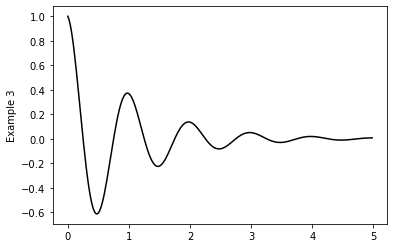

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def f(t):
     return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.02)
plt.plot(t1, f(t1), 'k')
plt.ylabel("Example 3")
plt.show()
